In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('default')

from bs4 import BeautifulSoup
import requests

In [2]:
df = pd.read_csv('Merged.csv')
df.drop(columns=['division'], inplace=True)

In [3]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_institutions')
soup = BeautifulSoup(r.text, 'html.parser')

# get all the rows in table
rows = soup.find('table', {'class': 'sortable'}).find_all('tr')[1:]

# get all uni name
unis = set([u.a.text.strip().lower() for u in rows])
unis.remove('university of illinois at urbana–champaign')
unis.add('university of illinois at urbana-champaign')

In [4]:
# division 1 college:
div1 = set()
for x in df['college'].unique():
    for u in unis:
        if x.lower() in u:
            div1.add(x)
# change division
df['division'] = df['college'].apply(lambda x: 1 if x in div1 else 0)

In [5]:

df.head(20)

,name,year_start,college,fame,YEAR,G,POS,TRB%,STL%,BLK%,PTS,AST%,division
0,Alaa Abdelnaby,1991,Duke University,0,1993.0,75.0,PF,14.6,1.0,1.2,578.0,3.0,1
1,Alaa Abdelnaby,1991,Duke University,0,1993.0,12.0,PF,13.4,1.9,1.6,64.0,9.5,1
2,Alaa Abdelnaby,1991,Duke University,0,1995.0,54.0,PF,13.1,1.5,1.8,256.0,5.0,1
3,Alaa Abdelnaby,1991,Duke University,0,1995.0,51.0,PF,13.0,1.6,1.9,254.0,5.3,1
4,Kareem Abdul-Jabbar,1970,"University of California, Los Angeles",1,1982.0,76.0,C,13.4,1.1,4.1,1818.0,11.9,1
5,Kareem Abdul-Jabbar,1970,"University of California, Los Angeles",1,1983.0,79.0,C,12.8,1.1,3.5,1722.0,10.8,1
6,Kareem Abdul-Jabbar,1970,"University of California, Los Angeles",1,1984.0,80.0,C,12.7,1.0,2.9,1717.0,11.5,1
7,Kareem Abdul-Jabbar,1970,"University of California, Los Angeles",1,1985.0,79.0,C,13.5,1.1,3.3,1735.0,13.1,1
8,Kareem Abdul-Jabbar,1970,"University of California, Los Angeles",1,1986.0,79.0,C,10.3,1.2,2.7,1846.0,15.7,1
9,Kareem Abdul-Jabbar,1970,"University of California, Los Angeles",1,1987.0,78.0,C,11.9,0.9,2.2,1366.0,11.6,1


In [12]:
# top ten uni of all time
uni = df.groupby('college').count().sort_values(by = 'name', ascending = False).reset_index().head(31)
uni

,college,name,year_start,fame,YEAR,G,POS,TRB%,STL%,BLK%,PTS,AST%,division
0,Unknown,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348
1,University of North Carolina,439,439,439,439,439,439,439,439,439,439,439,439
2,"University of California, Los Angeles",368,368,368,368,368,368,368,368,368,368,368,368
3,Duke University,352,352,352,352,352,352,352,352,352,352,352,352
4,University of Kentucky,351,351,351,351,351,351,351,351,351,351,351,351
5,University of Arizona,291,291,291,291,291,291,291,291,291,291,291,291
6,University of Michigan,276,276,276,276,276,276,276,276,276,276,276,276
7,Georgia Institute of Technology,268,268,268,268,268,268,268,268,268,268,268,268
8,University of Kansas,265,265,265,265,265,265,265,265,265,265,265,265
9,Michigan State University,227,227,227,227,227,227,227,227,227,227,227,227


In [7]:
df[(df['fame'] == 1) & (df['division'] == 1)].groupby('college').count().sort_values(by='name', ascending = False).head(10)

,name,year_start,fame,YEAR,G,POS,TRB%,STL%,BLK%,PTS,AST%,division
college,,,,,,,,,,,,
Georgetown University,68,68,68,68,68,68,68,68,68,68,68,68
University of North Carolina,41,41,41,41,41,41,41,41,41,41,41,41
Oregon State University,40,40,40,40,40,40,40,40,40,40,40,40
University of Houston,36,36,36,36,36,36,36,36,36,36,36,36
"University of California, Los Angeles",33,33,33,33,33,33,33,33,33,33,33,33
University of California,23,23,23,23,23,23,23,23,23,23,23,23
University of Connecticut,20,20,20,20,20,20,20,20,20,20,20,20
Gonzaga University,19,19,19,19,19,19,19,19,19,19,19,19
Louisiana Tech University,19,19,19,19,19,19,19,19,19,19,19,19


In [14]:
df[(df['fame'] == 1) & (df['division'] == 0)].year_start.unique()


array([1979, 1990, 1975, 1998, 2003, 1977, 1994, 1987, 1996, 1978])

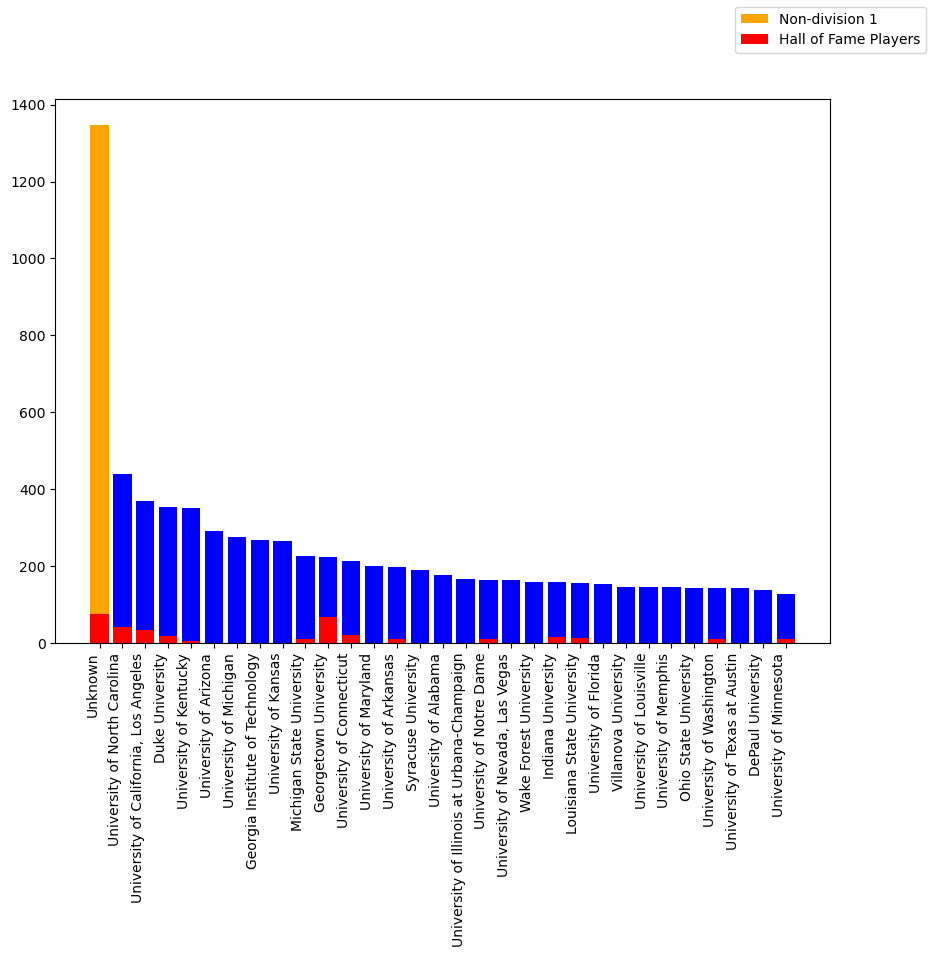

In [19]:
# return uni is divison 
def get_division(name):

    division = df[df['college'].isin([name])]['division'].unique()[0]

    return division

def get_fame_player(college):
    n_fames = df[(df['college'] == college) & df['fame'] == 1].groupby('college').count()['name'].max()
    return n_fames

fig, ax = plt.subplots( figsize=(10, 8))

colors = ['orange'  if  get_division(x) == 0 else 'blue' for x in uni['college']]
fames = [get_fame_player(x) for x in uni['college']]

ax.bar(uni['college'], uni['name'], color=colors)
ax.bar(uni['college'], fames, color ='red')

fig.legend(['Non-division 1', 'Hall of Fame Players', 'Division 1'], loc=1)

fig.autofmt_xdate(rotation='vertical')


In [21]:
df[df[('college'] == 'Unknown') == ]

,name,year_start,college,fame,YEAR,G,POS,TRB%,STL%,BLK%,PTS,AST%,division
43,Alex Abrines,2017,Unknown,0,2017.0,68.0,SG,4.5,1.7,0.6,406.0,5.5,0
141,Alexis Ajinca,2009,Unknown,0,2009.0,31.0,PF,10.2,2.1,2.7,70.0,2.8,0
142,Alexis Ajinca,2009,Unknown,0,2011.0,34.0,C,13.6,1.7,4.2,143.0,4.8,0
143,Alexis Ajinca,2009,Unknown,0,2011.0,10.0,C,13.3,2.1,5.1,29.0,4.3,0
144,Alexis Ajinca,2009,Unknown,0,2011.0,24.0,C,13.6,1.6,4.0,114.0,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14879,Wang Zhizhi,2001,Unknown,0,2004.0,16.0,C,9.2,1.4,3.4,47.0,3.3,0
14880,Wang Zhizhi,2001,Unknown,0,2004.0,14.0,C,7.8,1.6,3.0,43.0,3.6,0
14881,Wang Zhizhi,2001,Unknown,0,2005.0,20.0,C,11.4,1.7,1.6,43.0,9.2,0
14886,Paul Zipser,2017,Unknown,0,2017.0,44.0,SF,8.0,0.9,1.5,240.0,6.1,0
